In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('final_cleaned.csv')
df.shape


(10070, 2864)

In [3]:
cat_cols = ['company_name','company_about', 'founded', 'business model','employees','product stage','status','fund_stage', 'succeeded']
num_cols = ['total_raised','total_rounds', 'investors','ipo_price', 'geo_market_per']
tag_cols = [col for col in df.columns if col.startswith('tag_')]
targetmarket_cols = [col for col in df.columns if col.startswith('targetmarket_')]
sector_list = [col for col in df.columns if col.startswith("sector_")]
target_ind_list = [col  for col in df.columns if col.startswith("target_industry_")]
technology_list = [col  for col in df.columns if col.startswith("core_technology_")]
bin_cols = tag_cols + targetmarket_cols + sector_list + target_ind_list + technology_list

In [ ]:
for i, col in enumerate(bin_cols):
    name = col.split('_')
    property = name[0]
    df[col]

In [44]:
# count how many 1 for each row
l = []
for i, col in enumerate(df.index):
    l.append(df[sector_list].iloc[i,:].sum())

l.sort()

12.0

In [24]:
# sum of each column in dataframe
list_target_industry_dict = {}
list_target_industry = []
count = 0
for col in sector_list:
    list_target_industry_dict[col] = df[col].sum()
    list_target_industry.append(list_target_industry_dict[col])
    if list_target_industry_dict[col] == 1 :
        count += 1
    # print(f'{col}: {df[col].sum()}')
print(count)
# sort dict values in descending order
list_target_industry2 = sorted(list_target_industry_dict.items(), key=lambda x: x[1])
list_target_industry2

0


[('sector_Energy-tech_Nonrenewable Energy Sources', 11.0),
 ('sector_Aerospace & Aviation_Satellites & Space Exploration', 32.0),
 ('sector_Retail & Marketing_Procurement Management', 33.0),
 ('sector_Smart Mobility_Materials & Hardware', 33.0),
 ('sector_Smart Mobility_Maritime', 44.0),
 ('sector_Energy-tech_Energy Transmission & Distribution', 46.0),
 ('sector_Security Technologies_Defense Tech', 49.0),
 ('sector_Energy-tech_Energy Storage', 63.0),
 ('sector_AgriFood-tech & Water_Produce Preservation & Trade', 64.0),
 ('sector_AgriFood-tech & Water_Agricultural Inputs', 75.0),
 ('sector_Smart Mobility_Electrification & Energy', 75.0),
 ('sector_Enterprise, IT & Data Infrastructure_Legal Operations', 82.0),
 ('sector_AgriFood-tech & Water_Pathogens & Pests', 83.0),
 ('sector_Energy-tech_Energy Usage', 86.0),
 ('sector_Security Technologies_Physical Security', 88.0),
 ('sector_AgriFood-tech & Water_Food Processing', 90.0),
 ('sector_Aerospace & Aviation_UAV & Aircrafts', 95.0),
 ('sect

In [41]:
print(f"avg: {sum(list_target_industry_dict.values()) / len(list_target_industry_dict)}")
print(f"median: {sorted(list_target_industry_dict.values())[int(len(list_target_industry_dict)/4)]}")

avg: 423.43333333333334
median: 90.0


<BarContainer object of 60 artists>

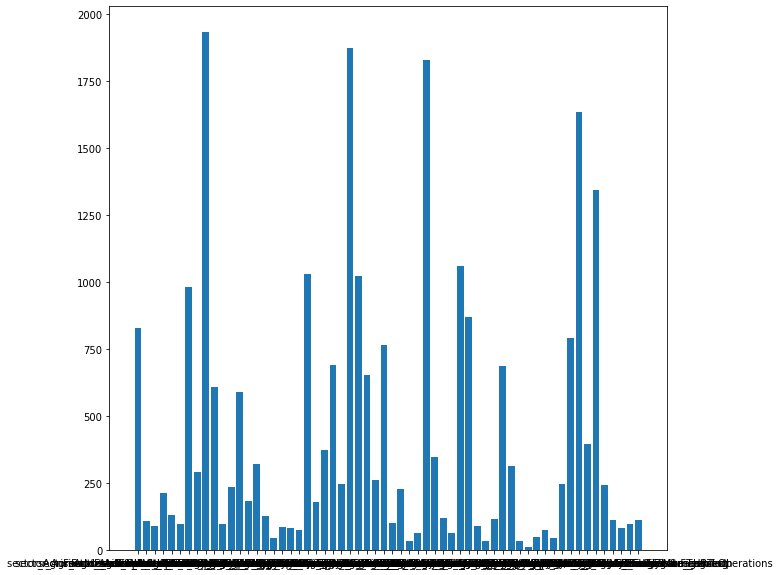

In [30]:
#  plot the values of list



import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


plt.bar(list_target_industry_dict.keys(), list_target_industry_dict.values())